<a href="https://colab.research.google.com/github/taegukang35/device_for_blind/blob/main/warping_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [6]:
model = load_model('/content/model-best-unet.h5')

In [533]:
def plot_results(i,img):
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    fig = plt.figure()     
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(img).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask[0][:,:,0])
    ax2.set_title('mask')
    ax2.axis("off")
    #plt.savefig('/content/model_result/result{0}.png'.format(i))

def create_mask(img):
    #img = cv2.imread(file_path)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    fig = plt.figure()     
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(img).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask[0][:,:,0])
    ax2.set_title('mask')
    ax2.axis("off")
    return mask[0][...,0]
    #plt.savefig('/content/model_result/result{0}.png'.format(i))

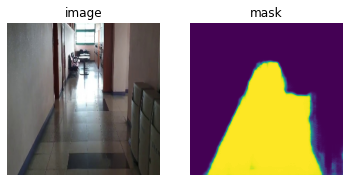

In [217]:
file_path = '/content/drive/MyDrive/school_hallway_v2/images_train/194.png'

img = img = cv2.imread(file_path)
img = cv2.resize(img, (SIZE_Y, SIZE_X))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mask = create_mask(file_path)

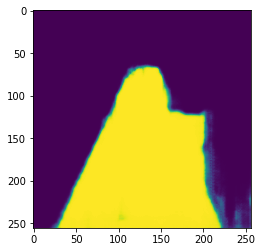

In [218]:
plt.imshow(mask)

In [223]:
#cv2.circle(img, (150, 100), 10, (255, 0 ,0), -1)
"""
cv2.circle(img, (115, 50), 10, (255, 0 ,0), -1)
cv2.circle(img, (135, 50), 10, (0, 255, 0), -1)
cv2.circle(img, (20, 250), 10, (0, 0, 255), -1)
cv2.circle(img, (230, 250), 10, (0, 255, 255), -1)
"""

pts1 = np.float32([[115,50],[135,50],[20,250],[230,250]])
pts2 = np.float32([[0,0],[400,0],[0,1000],[400,1000]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
result_img = cv2.warpPerspective(img,matrix,(1000,1000))
result_mask = cv2.warpPerspective(mask,matrix,(1000,1000))

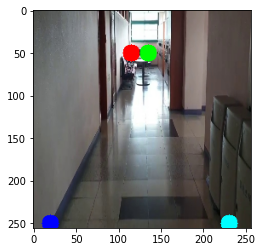

In [224]:
plt.imshow(img)

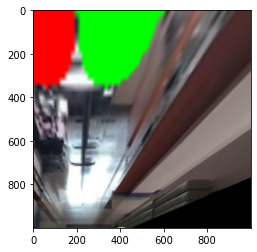

In [225]:
plt.imshow(result_img)

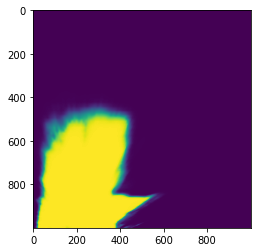

In [226]:
plt.imshow(result_mask)

#Warping Transformation

In [540]:
def transform(file_path):
    SIZE_X = 256 #Resize images (height  = X, width = Y)
    SIZE_Y = 256
    img = cv2.imread(file_path)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    #cv2.circle(image, (120, 160), 10, (255, 0 ,0), -1)
    
    fig = plt.figure(figsize=(20,10))  
    rows = 1
    cols = 4
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(image)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(image).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    threshold = 0.5
    _, mask = cv2.threshold(mask[0][...,0], threshold * mask[0][...,0].max(), 1, cv2.THRESH_BINARY)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask)
    ax2.set_title('mask')
    ax2.axis("off")

    pts1 = np.float32([[115,50],[135,50],[20,250],[230,250]])
    pts2 = np.float32([[100,0],[300,0],[100,1000],[300,1000]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    result_img = cv2.warpPerspective(image,matrix,(400,1000))
    result_mask = cv2.warpPerspective(mask,matrix,(400,1000))
    _,result_mask = cv2.threshold(result_mask,threshold*result_mask.max(),1,cv2.THRESH_BINARY)
    ax3 = fig.add_subplot(rows, cols, 3)
    ax3.imshow(result_img)
    ax3.set_title('warped img')
    ax3.axis("off")
    ax4 = fig.add_subplot(rows, cols, 4)
    ax4.imshow(result_mask)
    ax4.set_title('warped mask')
    ax4.axis("off")
    return image,mask,result_img,result_mask

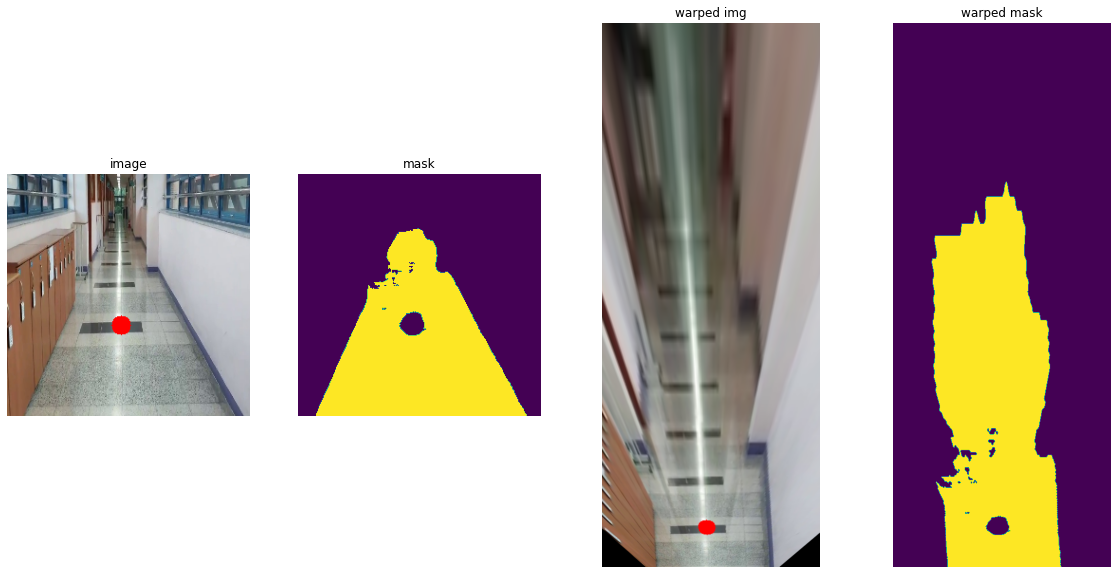

In [539]:
result = transform('/content/drive/MyDrive/school_hallway_v2/images_train/10.png') #threshold 0.5

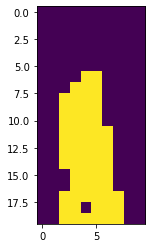

In [477]:
plt.imshow(cv2.resize(result[3],(10,20)))

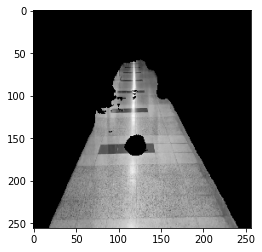

In [508]:
plt.imshow(result[0][...,2]*result[1],cmap='gray')

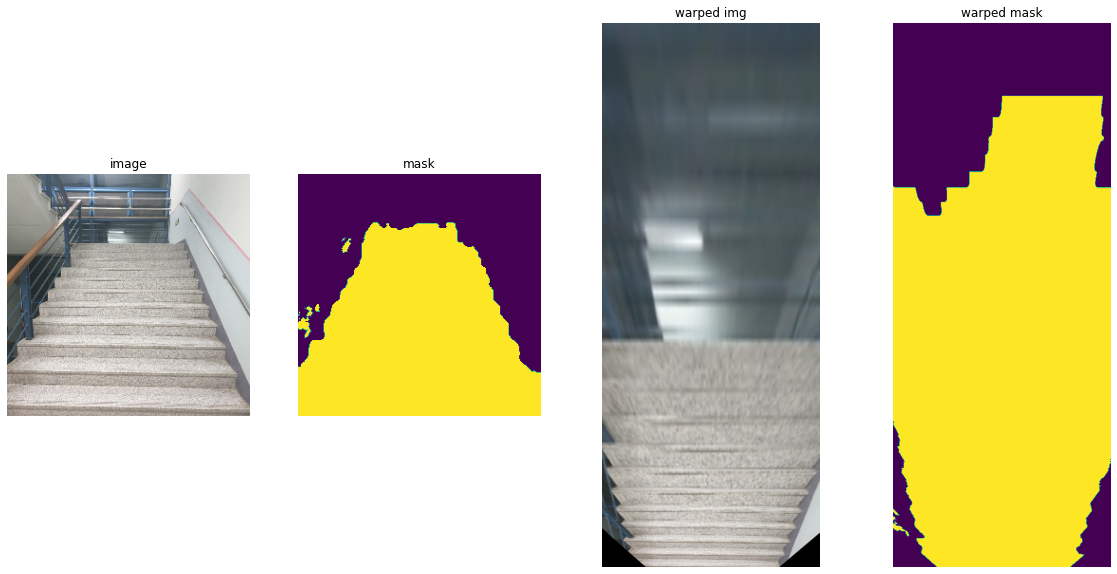

In [511]:
result = transform('/content/drive/MyDrive/stairhallway/test/KakaoTalk_20201124_204024796.jpg') #threshold 0.9 

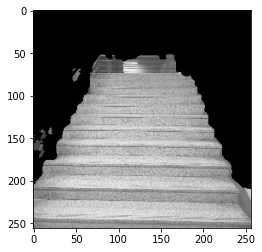

In [513]:
plt.imshow(result[0][...,2]*result[1],cmap='gray')

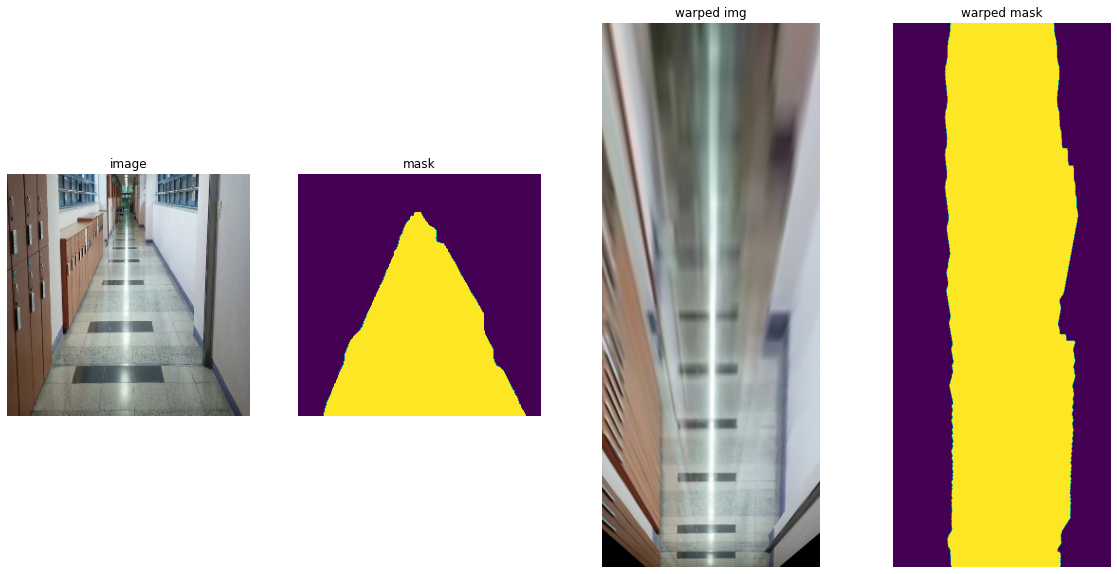

In [544]:
result = transform('/content/drive/MyDrive/school_hallway_v2/images_train/320.png') 